# Graded Lab Assignment: Logistic Regression

In this assignment you will classify hand-written digits using logistic regression.

The assignment follows Andrew Ng's explanation of Logistic Regression and (re)watching his videos could be useful (Week 3)

Publish your notebook (ipynb file) to your Machine Learning repository on Github ON TIME. We will check the last commit on the day of the deadline. 

### Deadline Tuesday, October 10th, 23:59

Do not hand in any other files, the Notebook should contain all your answers.

The points for the assignmnet are distributed as follows:
* The implementation
    - prediction_function
    - cost_function
    - compute_gradient
    - correct stop condition
    - preventing overfitting
    - systematically choosing learning rate 
    - 
    

In [143]:
import sklearn

In [144]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Scikit-learn is a toolkit that has several datasets built in. You first need to install the toolkit: http://scikit-learn.org/stable/install.html

The MNIST dataset that you will be using for this assignment contains images of hand-written digits that are only 8 by 8 pixels, which means the algorithm (logistic regression) should run on every computer.

The code in the cell below shows how to work with the digits dataset and  how to visualize it. As you can see the numbers are not very clear in 8x8 pixels images, this means we cannot expect our logistic regression will have a very high classification score.

The numbers shown are: 
 [[0 1 2 3 4]
 [5 6 7 8 9]]


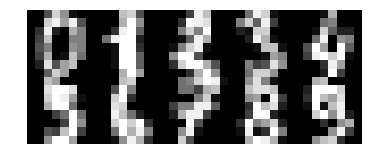

In [147]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=10)

#Create two rows with numbers
firstrow = np.hstack(digits.images[:5,:,:])
secondrow = np.hstack(digits.images[5:10,:,:])

plt.gray()
plt.axis('off')

#Show both rows at the same time
plt.imshow(np.vstack((firstrow,secondrow)))

print ("The numbers shown are: \n", np.vstack((digits.target[:5], digits.target[5:10])))

## The implementation

You have to implement the next three functions and fill in the body of the loop in order to create a correct implementation of logistic regression. Don't change the definitions of the functions and input parameters.

(1) Make sure that you do not overfit by keeping track of the score on the test set and implementing a correct stop condition. 
(2) Systematically pick a learning rate alpha that makes sure the algorithm learns in a smooth and stable manner (show how you do it). 
(3) Plot how your score on the test set improves over time. My best score was about 85% correct!
(4) Make sure to comment your code!

In [160]:
#Make a prediction function h
print(shape(x),shape(theta),shape(x_predict))
print(x.shape[0])
#our prediction function should output a value as close
#to one as possible for a certain "class" such that it classifies the 
#correct number
def prediction_function(x,theta):
    ex = exp(-dot(theta.T,x))
    x_predict = 1/(1+ ex)
    return x_predict

(1500, 64) (64, 10) (10,)
1500


In [159]:
#Use the output of that function to compute the cost function J:
print(shape(x_predict),shape(y))
def cost_function(x_predict,y):
    m = X.shape[0]
    cost = (y*log(x_predict)) + (1-y)*log(1-x_predict)
    J = - sum(cost) / size(x_predict)
    return cost 

(10,) (10,)


In [175]:
#Create a function that returns the gradient values, given h (x_predict), y and x:
print(shape(x_predict), shape(y), shape(x), shape(dtheta))
def compute_gradient(x_predict, y, x):
    d = outer((x_predict - y),x)
    dtheta = np.reshape(d,(64,10))
    return dtheta 
    

(10,) (10,) (1500, 64) (10, 64)


(1500, 64)
(297, 64)


/Users/charlotteout/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in exp


range(0, 25)


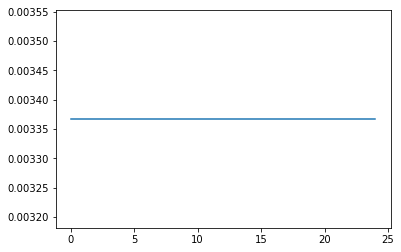

0.003367003367003367


In [212]:


#Variables
iterations = 25
theta = np.zeros((64,10))
stop_condition = 1
cost = 10
alpha = 0.02



x = np.reshape(digits.images[:1500],(1500,64))
print(x.shape)
x_test = np.reshape(digits.images[1500:],(297,64))
print(x_test.shape)

#These are the target datasets
target = digits.target[:1500]
target_test = digits.target[1500:]

#define an array with the accuracy after every iteration
accuracy_array = []


for i in range(iterations):
    #apply gradient descent on x for suitable learning 
    
    for j in range(x.shape[0]):
                x_predict = prediction_function(x[j,:].T,theta) #chance of it being a certain number
                y = np.zeros(10) 
                y[target[j]] = 1 #the position j indicates which number it is
                
                #calculate our dtheta
                dtheta = compute_gradient(x_predict, y, x[j,:])
                theta -= alpha*dtheta
    
    
    
    for j in range(x_test.shape[0]):
        #loops through every row of x_test and checks wether the prediction
        #is correct
        
        #define the corresponding prediction function
        x_predict = prediction_function(x_test[j,:].T, theta)
        
        if np.argmax(x_predict) == target_test[j]:
            correct = 0
            #Checks if the prediction is correct and update correct variable
            correct = correct + 1
    
    #define the corresponding accuracy and append to accuracy_array
    accuracy = correct / x_test.shape[0]
    accuracy_array.append(accuracy)

#define array with the iterations, we want to plot how the accuracy changes
#over the number of interations we do
IterationsArray = range(iterations)

print(IterationsArray)

plt.plot(IterationsArray,accuracy_array)
plt.show()

print(accuracy)
            
                    

        

    
